<a href="https://colab.research.google.com/github/bhavyaKumawat/tensorflow-datasets/blob/main/IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Formatting

In [1]:
formatting  = {'BOLD': '\033[1m', 'END': '\033[0m', 'UNDERLINE' : '\033[4m'}
colors = {'PURPLE' : '\033[95m', 'CYAN' : '\033[96m', 'DARKCYAN' : '\033[36m', 'BLUE' : '\033[94m', 'GREEN' : '\033[92m', 'RED' : '\033[91m', 'END': '\033[0m'}

## Import Libraries

In [2]:
import os
import urllib
import zipfile
import io
import tensorflow_datasets as tfds                  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences   
import numpy as np     
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Load Dataset

In [3]:
imdb, _ = tfds.load("imdb_reviews", with_info = True, as_supervised= True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRLTN0P/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRLTN0P/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRLTN0P/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = imdb["train"], imdb["test"]

In [5]:
print("Training Dataset Size : {} ".format(len(train_data)))
print("Test Dataset Size : {} ".format(len(test_data)))

Training Dataset Size : 25000 
Test Dataset Size : 25000 


## Let's see some examples

**take()** - Creates a Dataset with at most 4 elements from this dataset. <br>
**as_numpy_iterator()** - Returns an iterator which converts all elements of the dataset to numpy.

In [6]:
examples = train_data.take(2).as_numpy_iterator()

for index, (sentence, label) in enumerate(examples):
  print("{} Sentence {} : {}".format(colors["PURPLE"], index+1 , colors["END"]), sentence)
  print("{} Label {} : {}".format(colors["DARKCYAN"], index+1 , colors["END"]), label)

 Sentence 1 :  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 Label 1 :  0
 Sentence 2 :  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because th

## Text Preprocessing

In [7]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

# Tokenizer.fit_on_texts method takes input as list of strings
for sentence, label in train_data:
  # numpy() - Convert a tensor to numpy array
  train_sentences.append(str(sentence.numpy()))
  train_labels.append(label.numpy())

for sentence, label in test_data:
  test_sentences.append(str(sentence.numpy()))
  test_labels.append(label.numpy())

# labels are expected to be numpy arrays while training
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Tokenize the sentences

[Tokenizer docs](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [8]:
# hyperparameters
vocab_size = 10000 # the maximum number of words to keep, based on word frequency
oov_token = "<OOV>" # replace out-of-vocabulary words


tokenizer = Tokenizer(num_words= vocab_size, oov_token = oov_token) 
tokenizer.fit_on_texts(train_sentences) # build vocabulary based on a list of texts
word_index = tokenizer.word_index # returns a dictionary where the key is the word, and the value is the token for that word

In [9]:
print(formatting["BOLD"]+"Vocabulary Size"+formatting["END"] , len(word_index))
print(formatting["BOLD"]+"First 100 words in Vocabulary"+formatting["END"] , dict(list(word_index.items())[:100]))

Vocabulary Size 86539
First 100 words in Vocabulary {'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, "'s": 21, 'on': 22, 'you': 23, 'not': 24, 'are': 25, 'his': 26, 'he': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'by': 33, 'they': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'her': 40, "'t": 41, 'or': 42, 'just': 43, 'there': 44, 'about': 45, 'out': 46, "'": 47, 'has': 48, 'if': 49, 'some': 50, 'what': 51, 'good': 52, 'more': 53, 'very': 54, 'when': 55, 'she': 56, 'up': 57, 'can': 58, 'b': 59, 'time': 60, 'no': 61, 'even': 62, 'my': 63, 'would': 64, 'which': 65, 'story': 66, 'only': 67, 'really': 68, 'see': 69, 'their': 70, 'had': 71, 'were': 72, 'me': 73, 'well': 74, 'we': 75, 'than': 76, 'much': 77, 'been': 78, 'get': 79, 'bad': 80, 'will': 81, 'people': 82, 'do': 83, 'also': 84, 'other': 85, 'int

In [10]:
# Transforms each sentence in train_sentences to a sequence of integers
train_sequences = tokenizer.texts_to_sequences(train_sentences) 

test_sequences = tokenizer.texts_to_sequences(test_sentences) 

In [11]:
print(train_sentences[0])
print(colors["RED"]+"is tokenized to"+colors["END"])
print(train_sequences[0])


b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
is tokenized to
[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525,

## Pad the tokenized sequences

[pad_sequences docs](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)

In [12]:
#hyperparameters
max_length = 120
truncating_type = "post"
padding_type = "post"
embedding_dim = 100

# Sequences shorter than max_length are padded with 0 value 
# Sequences longer than max_length are truncated 
train_padded = pad_sequences(train_sequences, maxlen= max_length , truncating= truncating_type, padding = padding_type)

test_padded = pad_sequences(test_sequences, maxlen= max_length , truncating= truncating_type, padding = padding_type)

In [13]:
print(train_sequences[0])
print(colors["RED"]+"has been padded to"+colors["END"])
print(train_padded[0])


[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]
has been padded to
[  59   12   14   35  439  400   18  174   29    1    9   33 1378 3401
   42  496    1  197   25   88  156   19   12  211  340   29   70  248
  213    9  486   62   70   88  116   99   24 5740   12 3317  657  777
   12   18    7   35  406 8228  178 2477  426    2   92 1253  140   72
  149   55    2    1 7525   72  229   70 2962   16    1 2880    1    1
 1506 4998    3   40 3947  119 1608   17 3401   14  163   19    4 1253
  927 7986    9    4   18

## Using pre-trained Glove embeddings

[GloVe Embeddings](https://nlp.stanford.edu/projects/glove/)

In [14]:
# Glove embedding weights can be downloaded from
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
zip_file = os.path.basename(glove_url) # glove.6B.zip
zip_file_path = os.path.join(os.getcwd(), zip_file)

if not os.path.isfile(zip_file):
  urllib.request.urlretrieve(glove_url, filename = zip_file_path)

  # extract all the contents of the zip file to the current working directory
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall( os.getcwd())

In [15]:
# Available dimensions for 6B data is 50, 100, 200, 300
for file in os.listdir():
  if file.startswith("glove"):
    print(colors["PURPLE"]+file+colors["END"]) 

glove.6B.zip
glove.6B.200d.txt
glove.6B.50d.txt
glove.6B.100d.txt
glove.6B.300d.txt


In [16]:
embeddings_index = {} # dictionary for mapping words to their embeddings
with open('glove.6B.100d.txt') as file:
  for line in file:
    values = line.split() # Word and weights separated by space
    word = values[0] # Word is first element in each line
    word_weights = np.asarray(values[1:], dtype='float32') # Remainder of the line is weights for word
    embeddings_index[word] = word_weights
        
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim)) # shape (10001, 100) because 1-based indexing in word_index

for index, (word, token) in enumerate(word_index.items()):
  if index >= vocab_size: # len(word_index) >>> vocab_size because it contains all the unique words from the text corpus
    break
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None: 
      embeddings_matrix[token] = embedding_vector  

## Word Embedding and model building

In [17]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim = vocab_size+1, output_dim = embedding_dim, input_length = max_length, weights=[embeddings_matrix], trainable=False),
    keras.layers.Dropout(0.2),
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences = True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          1000100   
_________________________________________________________________
dropout (Dropout)            (None, 120, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [18]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [19]:
# early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [20]:
history = model.fit(
    train_padded,
    train_labels,
    epochs = 15,
    validation_data = (test_padded, test_labels),
    callbacks=[callback]
)

Epoch 1/15
782/782 [==============================] - 127s 148ms/step - loss: 0.6603 - accuracy: 0.6005 - val_loss: 0.5513 - val_accuracy: 0.7310
Epoch 2/15
782/782 [==============================] - 115s 146ms/step - loss: 0.4937 - accuracy: 0.7628 - val_loss: 0.4496 - val_accuracy: 0.7866
Epoch 3/15
782/782 [==============================] - 115s 147ms/step - loss: 0.4486 - accuracy: 0.7910 - val_loss: 0.4229 - val_accuracy: 0.8022
Epoch 4/15
782/782 [==============================] - 114s 146ms/step - loss: 0.4233 - accuracy: 0.8046 - val_loss: 0.4027 - val_accuracy: 0.8108
Epoch 5/15
782/782 [==============================] - 114s 146ms/step - loss: 0.4043 - accuracy: 0.8145 - val_loss: 0.3928 - val_accuracy: 0.8186
Epoch 6/15
782/782 [==============================] - 114s 146ms/step - loss: 0.3894 - accuracy: 0.8224 - val_loss: 0.3855 - val_accuracy: 0.8240
Epoch 7/15
782/782 [==============================] - 114s 146ms/step - loss: 0.3721 - accuracy: 0.8316 - val_loss: 0.3990 -

##Visualize the embeddings

In [21]:
embedding_layer = model.layers[0] #get the embedding layer
weights = embedding_layer.get_weights()[0]
print("Embeddings Shape : {}".format(weights.shape)) # shape = (vocab_size, embedding_dim)

Embeddings Shape : (10001, 100)


Lets write a function to decode the tokens back into the words

In [22]:
reverse_word_index = {token: word for (word, token) in word_index.items()} # reverse word_index dictionary

def decode_sequence(sequence):
  "Decodes the tokens back into the words in the sequence"
  return " ".join([reverse_word_index.get(token, '?') for token in sequence])

In [23]:
# lets see an example
print("{}Original sentence{}".format(colors["PURPLE"], colors["END"]), train_sentences[0])
print("{}Tokenized and again decoded back{}".format(colors["PURPLE"], colors["END"]), decode_sequence(train_padded[0]))

Original sentence b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Tokenized and again decoded back b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous 

Lets write the vectors and their metadata files. The **TensorFlow Projector** reads this file type and uses it to plot the vectors in 3D space so we can visualize them.

In [24]:
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_number in range(1, vocab_size): #for number of words in the vocabulary
    word = reverse_word_index[word_number]
    embeddings = weights[word_number]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [25]:
# download files from colab to your local machine
#files.download('vecs.tsv')
#files.download('meta.tsv')

#### To Visualize the embeddings :-
1.  Go to [Tensorflow Projector](https://projector.tensorflow.org/)
2.  Load the following files:
 * vecs.tsv
 * meta.tsv
3. Sphereize the data 





## Plot the training and validation **accuracy and loss**

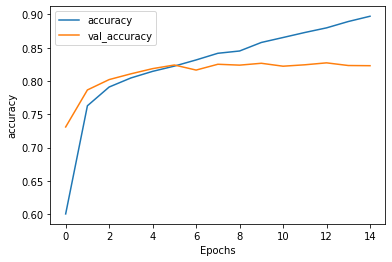

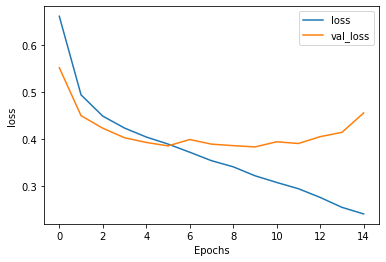

In [26]:
def plot_graphs(history, string):
  ""
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Plot Confusion Matrix

In [27]:
predictions = model.predict(test_padded)
predicted_labels = (predictions > 0.5)

In [28]:
print(colors["RED"]+"Confusion Matrix"+colors["END"])
print(confusion_matrix(predicted_labels, test_labels))
print(colors["DARKCYAN"]+"[[ TN    FP]\n [ FN    TP]]"+colors["END"])

Confusion Matrix
[[ 9815  1740]
 [ 2685 10760]]
[[ TN    FP]
 [ FN    TP]]
